Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
First few lines of data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0   

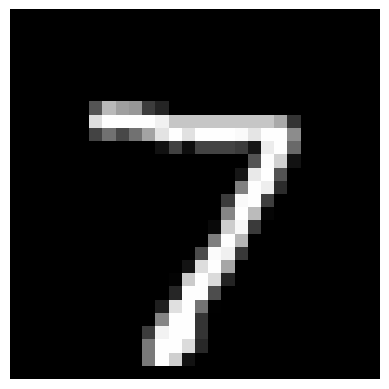

Epoch 100/100, Validation Accuracy: 0.9440, Validation Loss: 1.5351


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Load the data
df_test = pd.read_csv('mnist_test.csv')

print('Basic info:')
df_test.info()
print('First few lines of data:')
print(df_test.head())

# Separate labels and features
y = df_test['label'].values
X = df_test.drop('label', axis=1).values

# Function to show image
def show_image(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

print('The first image:')
show_image(X[0])

X = X / 255.0

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters
input_size = 28 * 28
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 10

# Weights initialization
np.random.seed(42)
W1 = np.random.rand(input_size, hidden_size_1) * 0.01
b1 = np.zeros((1, hidden_size_1))
W2 = np.random.rand(hidden_size_1, hidden_size_2) * 0.01
b2 = np.zeros((1, hidden_size_2))
W3 = np.random.rand(hidden_size_2, output_size) * 0.01
b3 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.1
epochs = 100
batch_size = 32

# Training loop
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Get mini - batch
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Forward propagation
        Z1 = np.dot(X_batch, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)
        Z3 = np.dot(A2, W3) + b3
        A3 = sigmoid(Z3)  # Final output

        # Backpropagation
        dZ3 = A3 - y_batch
        dW3 = np.dot(A2.T, dZ3) / batch_size
        db3 = np.sum(dZ3, axis=0, keepdims=True) / batch_size

        dZ2 = np.dot(dZ3, W3.T) * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2) / batch_size
        db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
        dW1 = np.dot(X_batch.T, dZ1) / batch_size
        db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

    # Evaluate on validation set
    Z1_val = np.dot(X_val, W1) + b1
    A1_val = sigmoid(Z1_val)
    Z2_val = np.dot(A1_val, W2) + b2
    A2_val = sigmoid(Z2_val)
    Z3_val = np.dot(A2_val, W3) + b3
    A3_val = sigmoid(Z3_val)
    A3_val = softmax(A3_val, axis=1)

    # Calculate accuracy
    val_predictions = np.argmax(A3_val, axis=1)
    val_true = np.argmax(y_val, axis=1)
    val_accuracy = accuracy_score(val_true, val_predictions)

    # Calculate cross - entropy loss
    val_loss = log_loss(y_val, A3_val)

    # print(f'Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}')
print(f'Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}')